In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(16,13)})

# Generate side-by-side plot

In [48]:
# Absolute error
def AE(y, y_hat, t, T):
    
    resid = np.abs(y - y_hat)
    
    return resid

#############################################

# Progression-based exponential decay
def PTD(y, y_hat, t, T, losstype="loss", weight=1):
    
    decay = ((T-t)/T)
    resid = np.abs(y - y_hat)
    
    if losstype=="loss":
        EP = resid + resid**decay
    if losstype=="penalty":
        EP = resid+ weight*(resid**decay)
        
    return EP

# Exponential decay factor
def ETD(y, y_hat, t, T, losstype="loss", weight=1):
    
    decay = np.exp(t)
    
    resid = np.abs(y - y_hat)
    
    if losstype=="loss":
        EP = resid + resid/decay
    if losstype=="penalty":
        EP = resid+ weight*(resid/decay)
    
    return EP

# Moderate exponential decay
def MTD(y, y_hat, t, T, losstype="loss", weight=1):
    
    decay = 1/t
    
    resid = np.abs(y - y_hat)
    
    if losstype=="loss":
        EP = resid + resid*decay
    if losstype=="penalty":
        EP = resid+ weight*(resid*decay)
    
    return EP



def generate_obs(metric, T = 10, factor = 1, loss_comp="loss"):
    
    y = np.linspace(start=250,stop=50, num=10,endpoint=True)
    
    y_hat = np.linspace(start=250,stop=50, num=10,endpoint=True)+50
    
    t = np.array([1,2,3,4,5,6,7,8,9,10])
    
    if metric == "AE":
        resid = AE(y, y_hat, t, T)
            
    if metric == "PTD":
        resid = PTD(y, y_hat, t, T, losstype=loss_comp, weight=factor)
            
    if metric == "ETD":
        resid = ETD(y, y_hat, t, T, losstype=loss_comp, weight=factor)
        
    if metric == "MTD":
        resid = MTD(y, y_hat, t, T, losstype=loss_comp, weight=factor)
        
    
    
    df = pd.DataFrame({"y":y,
                      "y_hat":y_hat,
                      "t":t,
                      "resid":resid,
                      "loss":[metric]*T,
                      "factor":[factor]*T,
                      "losstype":[loss_comp]*T})
    return df

In [49]:
#metrics_of_interest = ["AE","EP_lin","EP_lin_2","EP_log","EP_log_2","EP_exp","EP_exp_2"]

metrics_of_interest = ["AE","MTD","PTD","ETD"] #"LTG",
losstypes = ["loss"] #, 
factor_weights = [1] #0.25,0.5,0.75,

data = []

for factor_weight in factor_weights:
    for loss in losstypes:
        for metric in metrics_of_interest:
            obs = generate_obs(metric, loss_comp=loss,factor=factor_weight)
            data.append(obs)

residuals = pd.concat(data)
residuals.head()

,y,y_hat,t,resid,loss,factor,losstype
0,250.000000,300.000000,1,50.0,AE,1,loss
1,227.777778,277.777778,2,50.0,AE,1,loss
2,205.555556,255.555556,3,50.0,AE,1,loss
3,183.333333,233.333333,4,50.0,AE,1,loss
4,161.111111,211.111111,5,50.0,AE,1,loss


In [50]:
#residuals = residuals.rename(columns={"resid"})

In [51]:
#from matplotlib import cm
#cm.tab10(2)

C:\Users\Mike\AppData\Local\Temp\ipykernel_32112\620553969.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


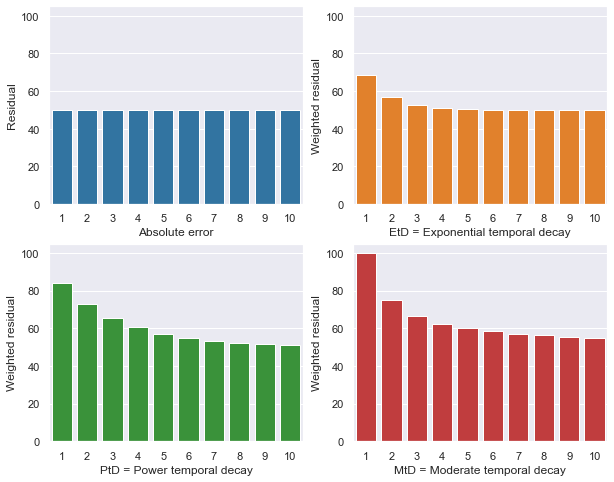

In [52]:
fig, ax = plt.subplots(2,2, figsize=(10, 8))

metric = "resid"
xaxis = "t"
hue = "loss"

fliersize = 1
width = 0.8

# Exclude some results

AE = residuals.loc[residuals.loss == "AE"]

sns.barplot(x=AE[xaxis], 
            y=AE[metric],
            #hue=AE[hue],
            color=cm.tab10(0),
            dodge=True,
            ax=ax[0,0])



MTD = residuals.loc[residuals.loss == "ETD"]

sns.barplot(x=MTD[xaxis], 
            y=MTD[metric],
            #hue=MTD[hue],
            color=cm.tab10(1),
            dodge=True,
            ax=ax[0,1])


PTD = residuals.loc[residuals.loss == "PTD"]

sns.barplot(x=PTD[xaxis], 
            y=PTD[metric],
            #hue=PTD[hue],
            color=cm.tab10(2),
            dodge=True,
            ax=ax[1,0])

ETD = residuals.loc[residuals.loss == "MTD"]

sns.barplot(x=ETD[xaxis], 
            y=ETD[metric],
            #hue=ETD[hue],            
            color=cm.tab10(3),
            dodge=True,
            ax=ax[1,1])

#ylabel="Weighted residual"

ax[0,0].set(xlabel='Absolute error', ylabel="Residual", ylim=[0,105]) #, xlim=[-0.5,6])
ax[0,0].legend([],[], frameon=False)
ax[0,1].set(xlabel='EtD = Exponential temporal decay', ylabel="Weighted residual", ylim=[0,105])#, xlim=[-0.5,6])
ax[0,1].legend([],[], frameon=False)
ax[1,0].set(xlabel='PtD = Power temporal decay', ylabel="Weighted residual", ylim=[0,105])#, xlim=[-0.5,6])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(xlabel='MtD = Moderate temporal decay', ylabel="Weighted residual", ylim=[0,105])#, xlim=[-0.5,6])
ax[1,1].legend([],[], frameon=False)


#plt.savefig("loss.png", dpi=200, bbox_inches = "tight")

fig.show()

# Relative weight

In [53]:
AE_sum = np.sum(residuals.loc[residuals.loss == "AE","resid"])
ETD_sum = np.sum(residuals.loc[residuals.loss == "ETD","resid"])
PTD_sum = np.sum(residuals.loc[residuals.loss == "PTD","resid"])
MTD_sum = np.sum(residuals.loc[residuals.loss == "MTD","resid"])

In [54]:
#sum of the penalty term versus accuracy term:0.058195028516771115
(ETD_sum-AE_sum)/AE_sum


0.058195028516771115

In [55]:
#sum of the penalty term versus accuracy term:0.2046964737527162
(PTD_sum-AE_sum)/AE_sum

0.2046964737527162

In [56]:
#sum of the penalty term versus accuracy term:0.2928968253968253
(MTD_sum-AE_sum)/AE_sum

0.2928968253968253